# Business Goal

X Education want to develop a model to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

Goal of the Case Study is :

Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

# About Data

Variables ---Description

Prospect ID	--A unique ID with which the customer is identified

Lead Number	--A lead number assigned to each lead procured.

Lead Origin	--The origin identifier with which the customer was identified to be a lead. Includes API, Landing Page Submission, etc.

Lead Source	--The source of the lead. Includes Google, Organic Search, Olark Chat, etc.

Do Not Email  --An indicator variable selected by the customer wherein they select whether of not they want to be emailed about the course or not.

Do Not Call	--An indicator variable selected by the customer wherein they select whether of not they want to be called about the course or not.

Converted	--The target variable. Indicates whether a lead has been successfully converted or not.

TotalVisits	--The total number of visits made by the customer on the website.

Total Time Spent on Website	--The total time spent by the customer on the website.

Page Views Per Visit	--Average number of pages on the website viewed during the visits.

Last Activity	--Last activity performed by the customer. Includes Email Opened, Olark Chat Conversation, etc.

Country	The country of the customer.

Specialization	--The industry domain in which the customer worked before. Includes the level 'Select Specialization' which 
means the customer had not selected this option while filling the form.

How did you hear about X Education	--The source from which the customer heard about X Education.

What is your current occupation	--Indicates whether the customer is a student, umemployed or employed.

What matters most to you in choosing this course --An option selected by the customer indicating what is their main motto behind doing this course.

Search	--Indicating whether the customer had seen the ad in any of the listed items.
Magazine
Newspaper Article
X Education Forums
Newspaper
Digital Advertisement

Through Recommendations	--Indicates whether the customer came in through recommendations.

Receive More Updates About Our Courses	--Indicates whether the customer chose to receive more updates about the courses.

Tags	--Tags assigned to customers indicating the current status of the lead.

Lead Quality	--Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.

Update me on Supply Chain Content	--Indicates whether the customer wants updates on the Supply Chain Content.

Get updates on DM Content	--Indicates whether the customer wants updates on the DM Content.

Lead Profile	--A lead level assigned to each customer based on their profile.

City	--The city of the customer.
Asymmetrique Activity Index	--An index and score assigned to each customer based on their activity and their profile
Asymmetrique Profile Index
Asymmetrique Activity Score
Asymmetrique Profile Score

I agree to pay the amount through cheque	--Indicates whether the customer has agreed to pay the amount through cheque or not.

a free copy of Mastering The Interview	--Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.

Last Notable Activity	--The last notable acitivity performed by the student.

# Import Python Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
# Plot Style
sns.set_context("paper")
style.use('fivethirtyeight')

## Sklearn library
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score,classification_report,accuracy_score,confusion_matrix,roc_auc_score,roc_curve,auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

## Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Setting up Jupyter View

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

# Importing the Input file

In [3]:
lead = pd.read_csv("Lead Scoring.csv")
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


# Inspect Dataframe

In [4]:
#database dimension
print("Database dimension     :",lead.shape)
print("Database size          :",lead.size)
print("Number of Row          :",len(lead.index))
print("Number of Columns      :",len(lead.columns))

Database dimension     : (9240, 37)
Database size          : 341880
Number of Row          : 9240
Number of Columns      : 37


In [5]:
#checking numerical columns statistics
lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#info about the column types etc. 
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Insight:

The data types of the columns are float, integer and object type. We can see there are some null values in the column. Let's inspect the null values first

# Null Value Calculation

Strategy:
    
There are quite a few columns which has 'Select' as one of the category. This is most probably because the person has not filled that field. We will replace this field with NaN

In [7]:
lead=lead.replace("Select",np.nan)

In [8]:
#Column wise Null Value calculate
#Column wise null values in train data set 
null_perc = pd.DataFrame(round((lead.isnull().sum())*100/lead.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(lead.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
13,How did you hear about X Education,7250,78.46
28,Lead Profile,6855,74.19
25,Lead Quality,4767,51.59
33,Asymmetrique Profile Score,4218,45.65
32,Asymmetrique Activity Score,4218,45.65
30,Asymmetrique Activity Index,4218,45.65
31,Asymmetrique Profile Index,4218,45.65
29,City,3669,39.71
12,Specialization,3380,36.58
24,Tags,3353,36.29


Insight:

There are 17 columns with null values. 7 columns have more than 45% unknowns which we should drop as imputing these columns will introduce bias. No rows whcih have more than 50% null values.

<AxesSubplot:>

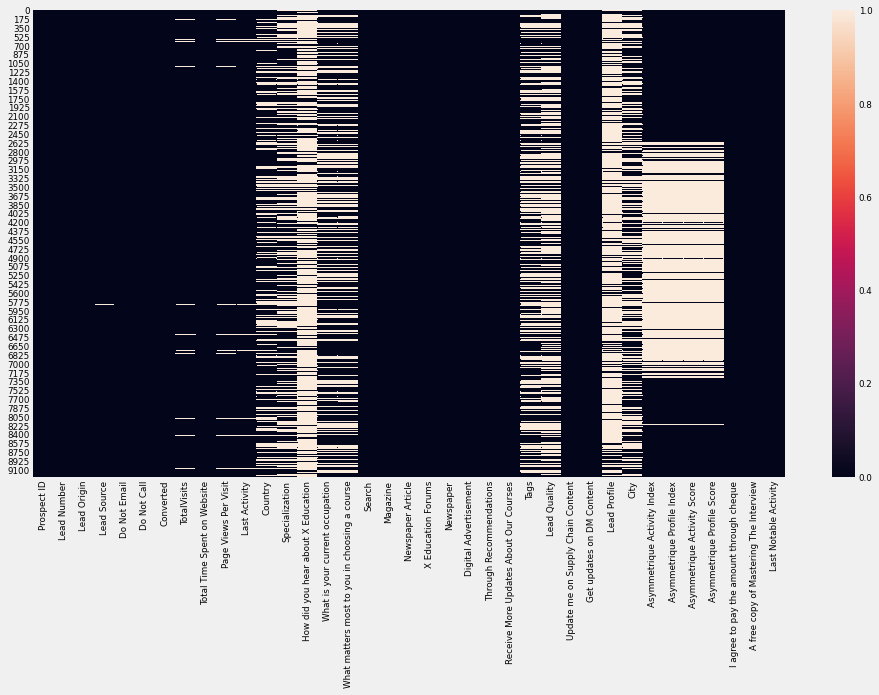

In [9]:
plt.figure(figsize=(15,8))
sns.heatmap(lead.isnull())

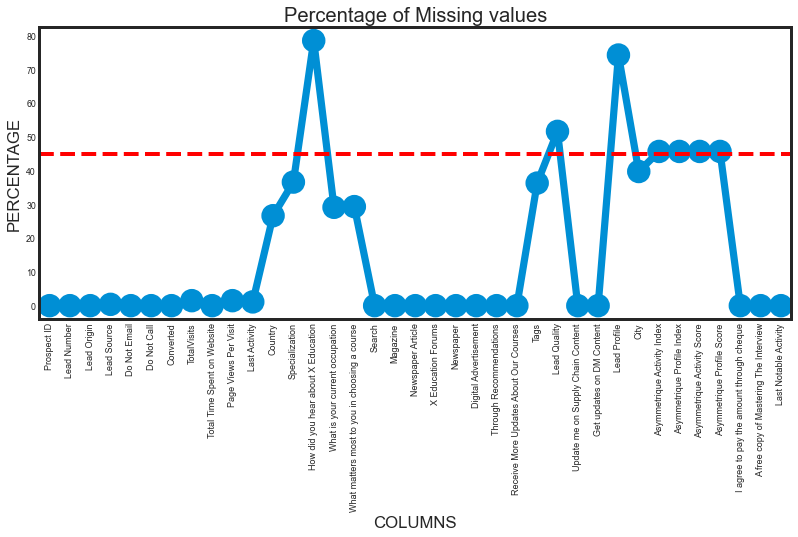

In [10]:
#Column wise Null Value calculate
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(12,5))
null_lead = pd.DataFrame((lead.isnull().sum())*100/lead.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(45, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

# Duplicate Analysis

In [11]:
print("Total number of duplicate values in Prospect ID column :" , lead.duplicated(subset = 'Prospect ID').sum())
print("Total number of duplicate values in Lead Number column :" , lead.duplicated(subset = 'Lead Number').sum())
print("Total number of duplicate values in Lead Origin column :" , lead.duplicated(subset = 'Lead Origin').sum())


#Lead Origin

Total number of duplicate values in Prospect ID column : 0
Total number of duplicate values in Lead Number column : 0
Total number of duplicate values in Lead Origin column : 9235


Insight:
    
Both the Prospect ID and Lead number are unique columns and hence we wont need for prediction

# Data Cleaning

#Delete High Null Columns

Strategy:
Clearly Prospect ID & Lead Number are two variables that are just indicative of the ID number of the Contacted People & can be dropped. We will also remove the columns which has more than 45% Null Values.
Also, some of the variables like Lead Quality, Tags, Asymmetrique scores and profile etc. are created by the sales team once they contact the potential lead. These variables will not be available for the model building as these features would not be available before the lead is being contacted.
Last Notable Activity is an intermediate column which is an update while the sales team representative is in touch with the lead.
Thus, we can drop these columns too.

In [12]:
cols_to_drop = ['Prospect ID','Lead Number','How did you hear about X Education','Lead Profile',
                'Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score',
               'Asymmetrique Activity Index','Asymmetrique Profile Index','Tags','Last Notable Activity']

In [13]:
## Dropping the unnecessary columns
lead.drop(cols_to_drop,axis=1,inplace=True)

In [14]:
lead.head()


,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,NaN,No,No
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Student,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,Yes
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,No,No,Mumbai,No,No


In [15]:
len(lead.columns)

26

Insight:

We have suceessfully deleted 10 columns where the columns had high null values or they are information which will not be available for models when it ran as they are calculated / selected by sales personnel when they contact potential leads.

# Segregating Categorical & Numerical Values

In [16]:
categorical_col=lead.select_dtypes(exclude=['number']).columns.values
numerical_col=lead.select_dtypes(include=['number']).columns.values


print("Categorical Features:\n{}".format(categorical_col))
print("Numerical Features:\n{}".format(numerical_col))

Categorical Features:
['Lead Origin' 'Lead Source' 'Do Not Email' 'Do Not Call' 'Last Activity'
 'Country' 'Specialization' 'What is your current occupation'
 'What matters most to you in choosing a course' 'Search' 'Magazine'
 'Newspaper Article' 'X Education Forums' 'Newspaper'
 'Digital Advertisement' 'Through Recommendations'
 'Receive More Updates About Our Courses'
 'Update me on Supply Chain Content' 'Get updates on DM Content' 'City'
 'I agree to pay the amount through cheque'
 'A free copy of Mastering The Interview']
Numerical Features:
['Converted' 'TotalVisits' 'Total Time Spent on Website'
 'Page Views Per Visit']


# Categorical Column Analysis

In [17]:
def Cat_info(df,categorical_column):
    df_result=pd.DataFrame(columns=["columns","values","unique_values","null_values","null_percent"])
    
    df_temp=pd.DataFrame()
    for value in categorical_column:
        df_temp['columns']=[value]
        df_temp['values']=[df[value].unique()]
        df_temp["unique_values"]=df[value].nunique()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [18]:
df_cat = Cat_info(lead, categorical_col)
df_cat

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
Digital Advertisement,"[No, Yes]",2,0,0.0


Insight:

1-Some of the columns have only 1 category.Example - Magazine,I agree to pay the amount through cheque etc. These columns will not add any value to the model and can be deleted.

2-Some of the columns have one of the value as "Select" These should be considered as null values. Data Value needs to be updated for these columns

In [19]:
# Appending the columns to col_to_drop where only 1 category value is present

cols_to_drop = df_cat[df_cat['unique_values']==1].index.values.tolist() 
cols_to_drop

['I agree to pay the amount through cheque',
 'Get updates on DM Content',
 'Update me on Supply Chain Content',
 'Receive More Updates About Our Courses',
 'Magazine']

In [20]:
#dropping unnecessary columns

lead.drop(cols_to_drop, 1, inplace = True)
len(lead.columns)

21

Checking the new null value and column details for Categorical columns

In [21]:
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat = Cat_info(lead, categorical_col)
new_cat

,values,unique_values,null_values,null_percent
columns,,,,
City,"[nan, Mumbai, Thane & Outskirts, Other Metro C...",6,3669,39.7
Specialization,"[nan, Business Administration, Media and Adver...",18,3380,36.6
What matters most to you in choosing a course,"[Better Career Prospects, nan, Flexibility & C...",3,2709,29.3
What is your current occupation,"[Unemployed, Student, nan, Working Professiona...",6,2690,29.1
Country,"[nan, India, Russia, Kuwait, Oman, United Arab...",38,2461,26.6
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,103,1.1
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",21,36,0.4
X Education Forums,"[No, Yes]",2,0,0.0
Through Recommendations,"[No, Yes]",2,0,0.0


Now we can proceed with addressing individual columns for null values.

# City

In [22]:
lead['City'].value_counts(normalize=True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

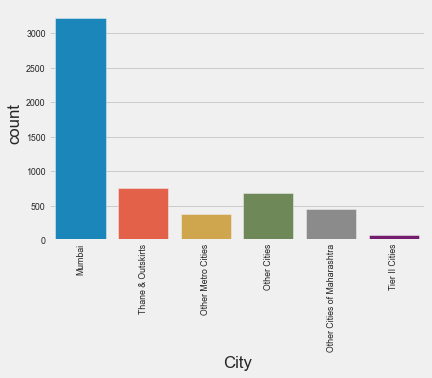

In [23]:
style.use('fivethirtyeight')
sns.countplot(lead['City'])
plt.xticks(rotation=90)
plt.show()

Insight:

As there is almost 40% unknown values, we cannot impute with mode as it is make the whole data skewed. Also, X-Education is online teaching platform. The city information will not be much useful as potential students can available any courses online despite their city. We will drop the column from analysis.

In [24]:
lead.drop("City",axis=1, inplace = True)
len(lead.columns)

20

# Specialization

In [25]:
lead['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Media and Advertising                 3.464164
Travel and Tourism                    3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

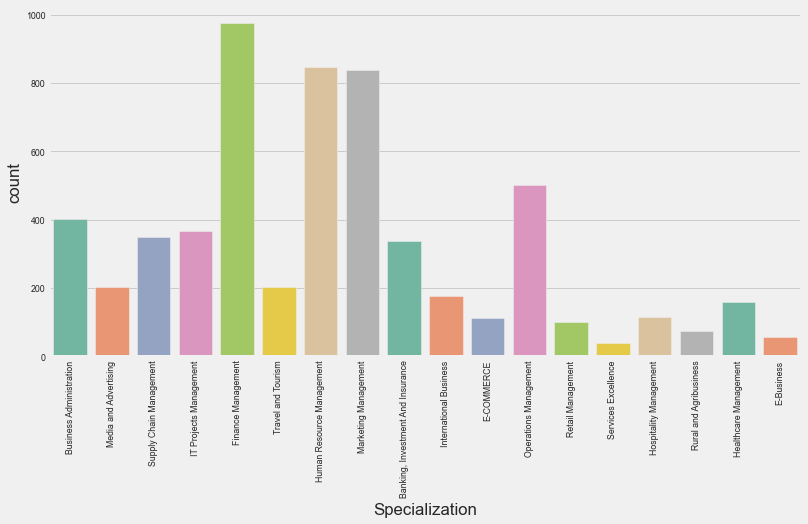

In [26]:
plt.figure(figsize=(12,6))
sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

Insight:

It may be possible that the lead has no specialization or may be a student and has no work experience yet , thus he/she has not entered any value. We will create a new category called 'Others' to replace the null values.

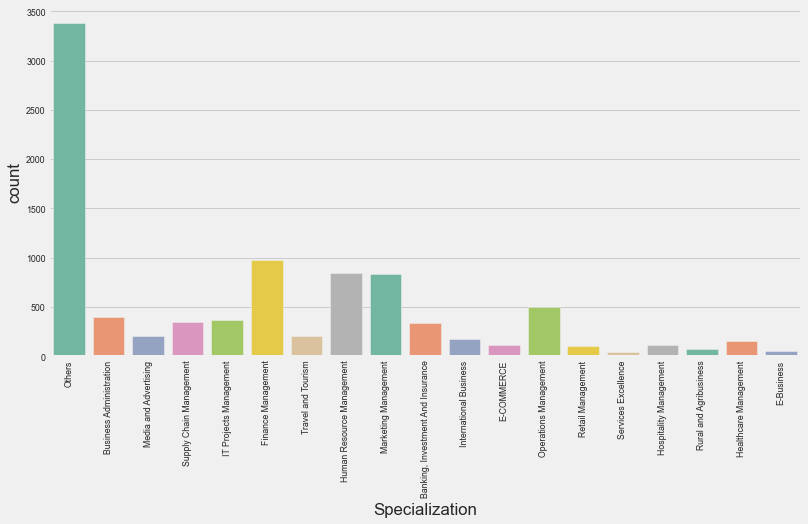

In [27]:
lead['Specialization']=lead['Specialization'].replace(np.nan,"Others")
plt.figure(figsize=(12,6))
sns.countplot(lead['Specialization'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

# What matters most to you in choosing a course

In [28]:
lead['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects      99.954065
Flexibility & Convenience     0.030623
Other                         0.015312
Name: What matters most to you in choosing a course, dtype: float64

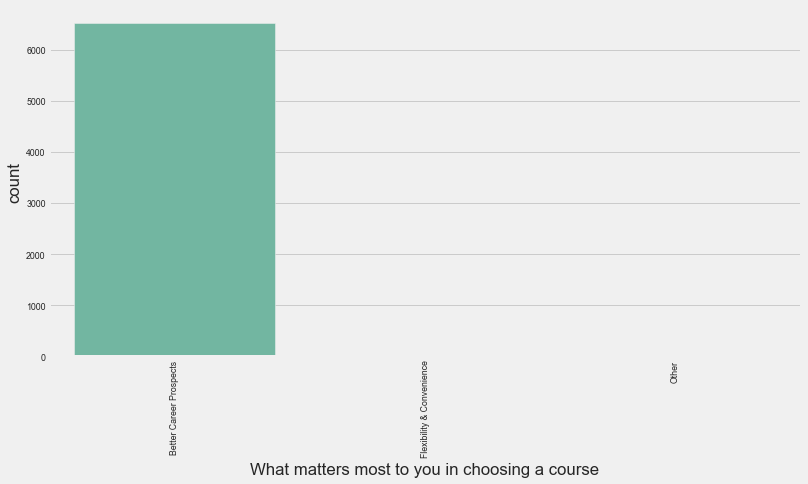

In [29]:
plt.figure(figsize=(12,6))
sns.countplot(lead['What matters most to you in choosing a course'],palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

Insight:
    
As the data is skewed, we can delete the column.

In [30]:
lead.drop('What matters most to you in choosing a course', axis = 1, inplace=True)
len(lead.columns)

19

In [31]:
lead['What is your current occupation'].value_counts(normalize=True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

Insight:
    
85.5% values are "Unemployed". If we impute the data as "Unemployed" then data will become more skewed. Thus, we will impute the value as "Unknown".

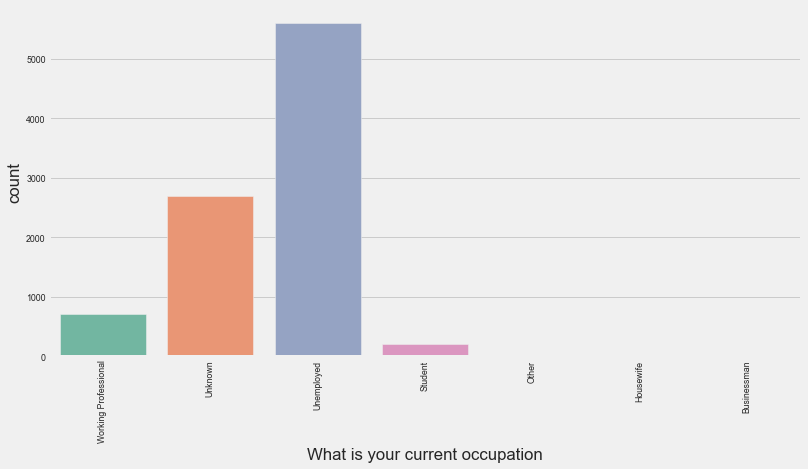

In [32]:
lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan, 'Unknown')
plt.figure(figsize=(12,6))
sns.countplot(lead['What is your current occupation'].sort_values(ascending=False),palette = 'Set2')
plt.xticks(rotation = 90)
plt.show()

In [33]:
#Let's check how is the Country data distributed
lead['Country'].value_counts(normalize=True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Bahrain                  0.103260
Hong Kong                0.103260
France                   0.088509
Oman                     0.088509
unknown                  0.073757
Nigeria                  0.059006
Canada                   0.059006
South Africa             0.059006
Kuwait                   0.059006
Germany                  0.059006
Sweden                   0.044254
Netherlands              0.029503
Bangladesh               0.029503
Ghana                    0.029503
Italy                    0.029503
Philippines              0.029503
Uganda                   0.029503
Belgium                  0.029503
China                    0.029503
Asia/Pacific Region      0.029503
Indonesia                0.014751
Tanzania      

Insights:

Country data is heavily skewed as 95% of the data is mapped as India. Similar to City, Country data is not required for Model building as X-Education is online platform. We will drop the country columns too.

In [34]:
lead.drop('Country', axis = 1, inplace = True)
len(lead.columns)

18

In [35]:
print("Number of null values present in Last Activity column is",lead['Last Activity'].isnull().sum())
print("Percentage of Null values present in Last Activity Columns is",(lead['Last Activity'].isnull().sum())*100/lead.shape[0])

Number of null values present in Last Activity column is 103
Percentage of Null values present in Last Activity Columns is 1.1147186147186148


In [36]:
lead['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Marked Spam                0.021889
Email Received                   0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [37]:
lead['Last Activity']=lead['Last Activity'].replace(np.nan,"Email Opened")
print("Number of null values in Last Activity column is : ", lead['Last Activity'].isnull().sum())

Number of null values in Last Activity column is :  0


# Lead Source

In [38]:
lead['Lead Source'].value_counts(normalize = True)*100

Google               31.160365
Direct Traffic       27.629292
Olark Chat           19.067797
Organic Search       12.538027
Reference             5.801825
Welingak Website      1.542807
Referral Sites        1.358105
Facebook              0.597566
bing                  0.065189
google                0.054324
Click2call            0.043459
Live Chat             0.021730
Social Media          0.021730
Press_Release         0.021730
WeLearn               0.010865
NC_EDM                0.010865
Pay per Click Ads     0.010865
testone               0.010865
welearnblog_Home      0.010865
youtubechannel        0.010865
blog                  0.010865
Name: Lead Source, dtype: float64

In [39]:
lead['Lead Source'] = lead['Lead Source'].replace(np.nan, 'Google')
lead['Lead Source'] = lead['Lead Source'].replace('google', 'Google')

In [40]:
## Again Checking null Values
categorical_col = lead.select_dtypes(exclude =["number"]).columns.values
new_cat_null = Cat_info(lead, categorical_col)
new_cat_null

,values,unique_values,null_values,null_percent
columns,,,,
Lead Origin,"[API, Landing Page Submission, Lead Add Form, ...",5,0,0.0
Lead Source,"[Olark Chat, Organic Search, Direct Traffic, G...",20,0,0.0
Do Not Email,"[No, Yes]",2,0,0.0
Do Not Call,"[No, Yes]",2,0,0.0
Last Activity,"[Page Visited on Website, Email Opened, Unreac...",17,0,0.0
Specialization,"[Others, Business Administration, Media and Ad...",19,0,0.0
What is your current occupation,"[Unemployed, Student, Unknown, Working Profess...",7,0,0.0
Search,"[No, Yes]",2,0,0.0
Newspaper Article,"[No, Yes]",2,0,0.0


So we have sucessfully inputed all categorical columns

# Numerical Columns Null Value Treatment

In [41]:
# Checking unique values and null values for the categorical columns
def Num_info(df, numeric_column):
    df_result = pd.DataFrame(columns=["columns","null_values","null_percent","Skewness"])
    
    df_temp=pd.DataFrame()
    for value in numeric_column:
        df_temp["columns"] = [value]
        df_temp["Skewness"] = df[value].skew()
        df_temp["null_values"] = df[value].isna().sum()
        df_temp["null_percent"] = (df[value].isna().sum()/len(df)*100).round(1)
        df_result = df_result.append(df_temp)
    
    df_result.sort_values("null_values", ascending =False, inplace=True)
    df_result.set_index("columns", inplace=True)
    return df_result

In [42]:
df_num = Num_info(lead,numerical_col)
df_num

,null_values,null_percent,Skewness
columns,,,
TotalVisits,137,1.5,19.911657
Page Views Per Visit,137,1.5,2.871793
Converted,0,0.0,0.471058
Total Time Spent on Website,0,0.0,0.956450


# Total Visits

<AxesSubplot:xlabel='TotalVisits'>

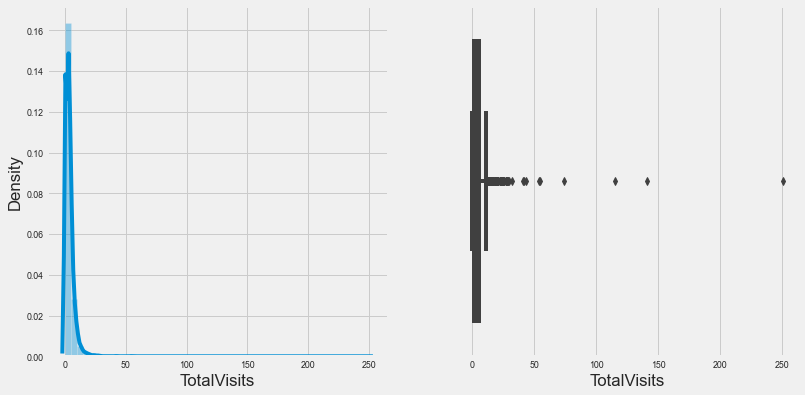

In [43]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.distplot(lead['TotalVisits'])
plt.subplot(1,2,2)
sns.boxplot(lead['TotalVisits'])

Insight:

As we see there are some outliers in the data, we will impute with median and not mean value.

In [44]:
lead['TotalVisits']=lead['TotalVisits'].fillna(lead['TotalVisits'].median())
lead['TotalVisits'].isnull().sum()

0

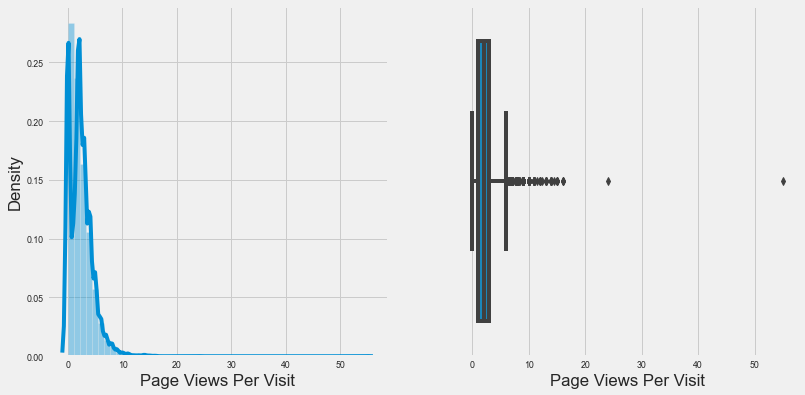

In [45]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.distplot(lead['Page Views Per Visit'])
plt.subplot(1,2,2)
sns.boxplot(lead['Page Views Per Visit'])
plt.show()

In [46]:
lead['Page Views Per Visit']=lead['Page Views Per Visit'].fillna(lead['Page Views Per Visit'].median())
lead['Page Views Per Visit'].isnull().sum()

0

In [47]:
numerical_col = lead.select_dtypes(include=["number"]).columns.values
new_num_null = Num_info(lead, numerical_col)
new_num_null

,null_values,null_percent,Skewness
columns,,,
Converted,0,0.0,0.471058
TotalVisits,0,0.0,20.061230
Total Time Spent on Website,0,0.0,0.956450
Page Views Per Visit,0,0.0,2.898954


# 5. Exploratory Data Analysis

# Data Imbalance

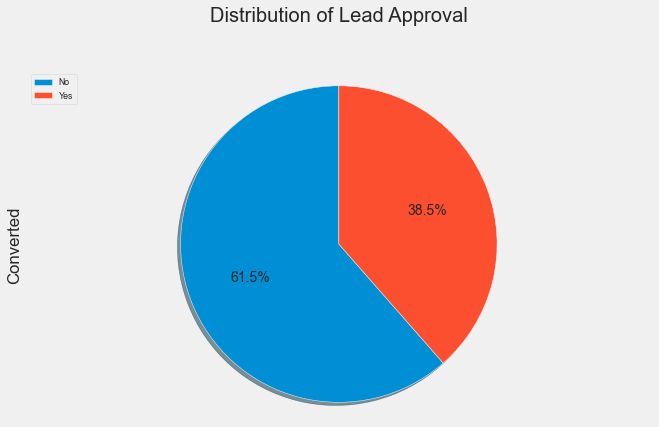

In [48]:
labels = 'No','Yes'
lead['Converted'].astype(str).value_counts().plot(kind='pie',
                            figsize=(10, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                                
                            )

plt.title('Distribution of Lead Approval', y=1.12) 
plt.axis('equal') 
# add legend
plt.legend(labels=labels, loc='upper left') 
 # show plot
plt.show()

Insight:

In the lead conversion ration, 38.5% has converted to leads where as 61.5% did not convert to a lead. So it seems like a balanced dataset.

Insight:

Most of the features in the dataset are categorical. Let us begin our analysis by performing segmented univariate analysis on each categorical feature. We will view bar plots that will show the total count of converted and non-converted leads in every category.

In [49]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Search', 'Newspaper Article',
       'X Education Forums', 'Newspaper', 'Digital Advertisement',
       'Through Recommendations', 'A free copy of Mastering The Interview'],
      dtype='object')

In [50]:
# Renaming some of the column headers which has long header
lead.rename(columns={"What is your current occupation":'Occupation',"A free copy of Mastering The Interview":"Free Copy",
                     "Through Recommendations":"Recommendation"},inplace=True)
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

# Univariate Analysis - Categorical

In [51]:
converted_lead=lead[lead['Converted']==1]
fail_lead=lead[lead['Converted']==0]

In [52]:
 def univariate_categorical(column):
    check=pd.DataFrame()
    check['Total Leads']=lead[column].value_counts()
    check['Qualified Lead']=converted_lead[column].value_counts()
    check['Non Qualified Lead']=fail_lead[column].value_counts()
    check["% Lead Converted"]=round(check['Qualified Lead']*100/check['Total Leads'],2)
    check=check.fillna(0)
    #check.columns=['Leads','Total Leads','Qualified Lead',"Non Qualify Lead","% Lead Converted"]
    check.reset_index(inplace=True)## 
    check=check.rename(columns={"index":column})
    
    
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title(column)
    plt.xticks(rotation = 90)
    sns.countplot(lead[column],hue=lead['Converted'])

    plt.subplot(1,2,2)
    plt.title("% of Lead Conversion")
    plt.xticks(rotation = 90)
    sns.barplot(x=check[column],y=check['% Lead Converted'],data=lead)
                                           
    return check
#check["% of lead qulify"]=

,Lead Origin,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,Landing Page Submission,4886,1768,3118.0,36.19
1,API,3580,1115,2465.0,31.15
2,Lead Add Form,718,664,54.0,92.48
3,Lead Import,55,13,42.0,23.64
4,Quick Add Form,1,1,0.0,100.00


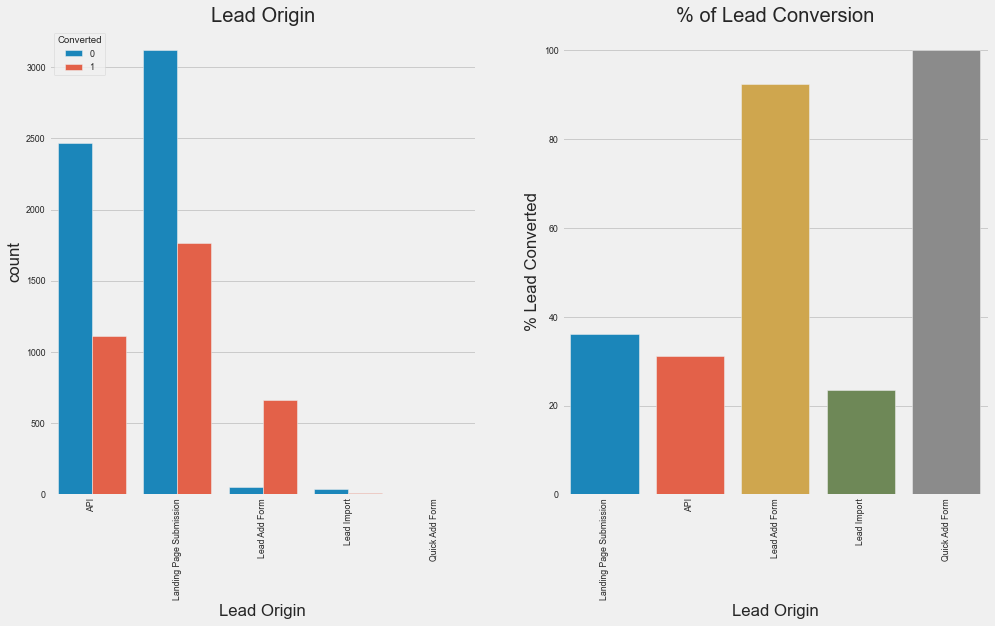

In [53]:
univariate_categorical('Lead Origin')

,Lead Source,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,Google,2909,1176.0,1733.0,40.43
1,Direct Traffic,2543,818.0,1725.0,32.17
2,Olark Chat,1755,448.0,1307.0,25.53
3,Organic Search,1154,436.0,718.0,37.78
4,Reference,534,490.0,44.0,91.76
5,Welingak Website,142,140.0,2.0,98.59
6,Referral Sites,125,31.0,94.0,24.80
7,Facebook,55,13.0,42.0,23.64
8,bing,6,1.0,5.0,16.67
9,Click2call,4,3.0,1.0,75.00


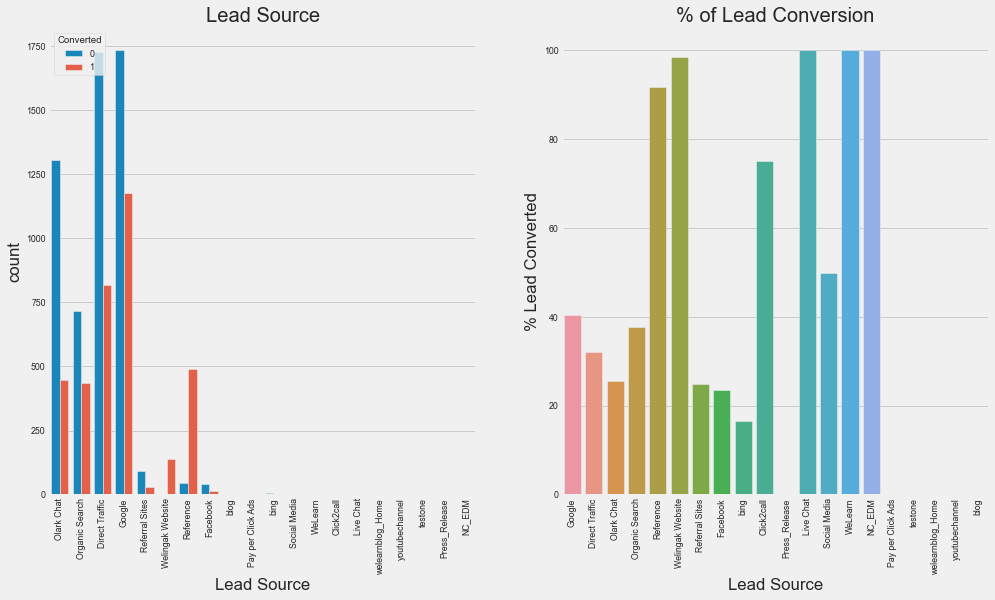

In [54]:
univariate_categorical('Lead Source')

Strategy:
    
We will combine smaller lead sources as 'Other Sources'.

In [55]:
lead['Lead Source']=lead['Lead Source'].replace(["bing",'Click2call','Live Chat','Social Media','Press_Release',
                                               "NC_EDM","welearnblog_Home",'testone','WeLearn','youtubechannel','blog','Pay per Click Ads'],'Others')

,Lead Source,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,Google,2909,1176.0,1733.0,40.43
1,Direct Traffic,2543,818.0,1725.0,32.17
2,Olark Chat,1755,448.0,1307.0,25.53
3,Organic Search,1154,436.0,718.0,37.78
4,Reference,534,490.0,44.0,91.76
5,Welingak Website,142,140.0,2.0,98.59
6,Referral Sites,125,31.0,94.0,24.80
7,Facebook,55,13.0,42.0,23.64
8,Others,23,0.0,0.0,0.00


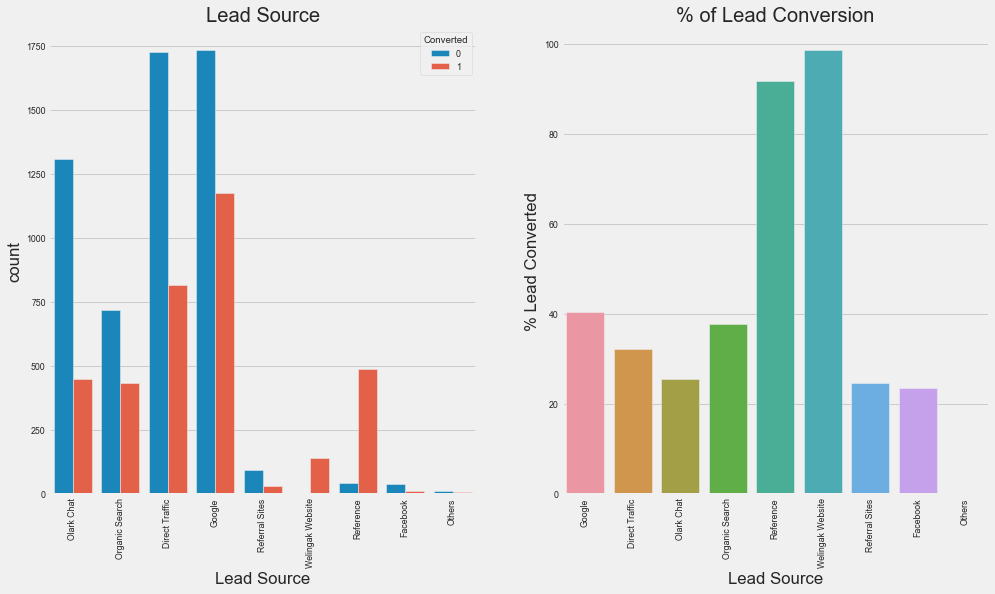

In [56]:
univariate_categorical('Lead Source')

Insight:
    
1-The source of most leads was Google, and 40% of the leads converted, followed by Direct Traffic,Organic search and Olark chat where around 35%, 38% and 30% converted respectively.

2-A lead that came from a reference has over 90% conversion from the total of 534.

3-Welingak Website has almost 100% lead conversion rate. This option should be explored more to increase lead conversion

4-To increase lead count, initiatives should be taken so already exitsing members increase their referrals.

,Do Not Email,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,No,8506,3443,5063,40.48
1,Yes,734,118,616,16.08


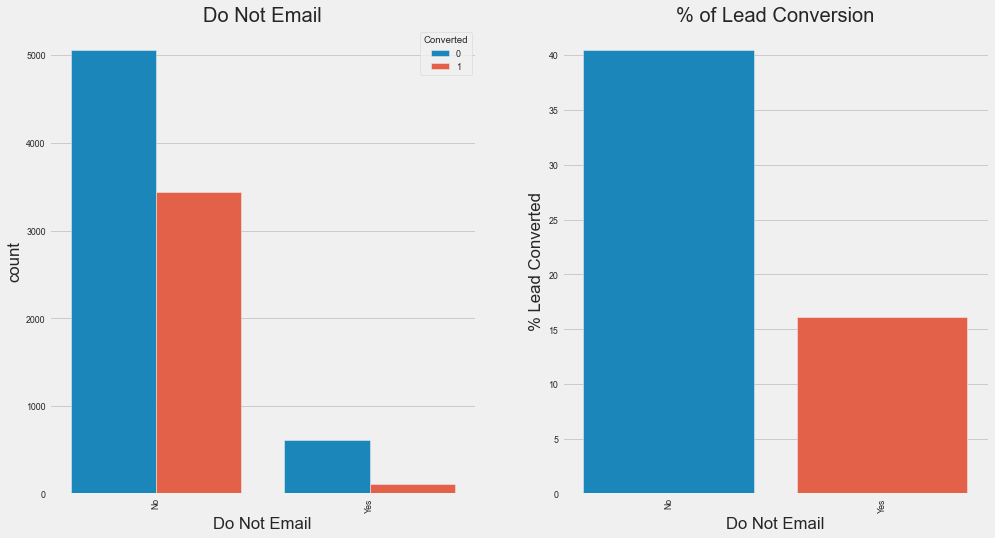

In [57]:
#Run the function to get plot categorical plots
univariate_categorical("Do Not Email")

Insight:
    
1-Majority of the people are ok with receiving email (~92%)

2-People who are ok with email has conversion rate of 40%

3-People who have opted out of receive email has lower rate of conversion (only 15%)

,Last Activity,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,Email Opened,3540,1334.0,2206.0,37.68
1,SMS Sent,2745,1727.0,1018.0,62.91
2,Olark Chat Conversation,973,84.0,889.0,8.63
3,Page Visited on Website,640,151.0,489.0,23.59
4,Converted to Lead,428,54.0,374.0,12.62
5,Email Bounced,326,26.0,300.0,7.98
6,Email Link Clicked,267,73.0,194.0,27.34
7,Form Submitted on Website,116,28.0,88.0,24.14
8,Unreachable,93,31.0,62.0,33.33
9,Unsubscribed,61,16.0,45.0,26.23


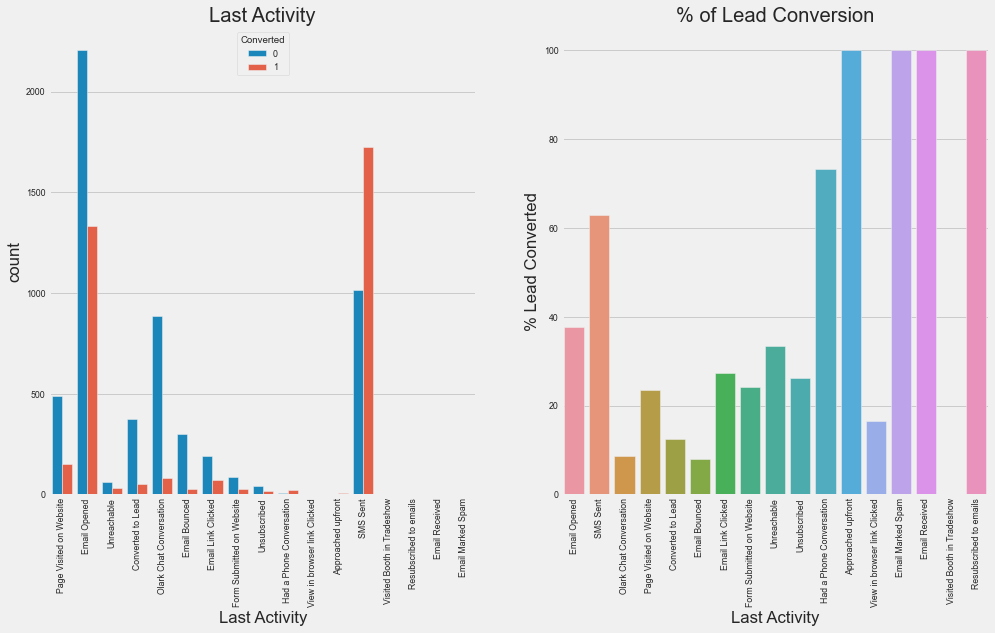

In [58]:
#Run the function to get plot categorical plots
univariate_categorical("Last Activity")

Strategy:

We will combine smaller Last Activity values as 'Other Activity'.

In [59]:
lead.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Specialization', 'Occupation',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Recommendation', 'Free Copy'],
      dtype='object')

In [60]:
lead['Last Activity']=lead['Last Activity'].replace(['Had a Phone Conversation','Approached upfront','View in browser link Clicked','Email Marked Spam','Email Received','Resubscribed to emails','Visited Booth in Tradeshow'],'Other Activity')


,Last Activity,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,Email Opened,3540,1334.0,2206.0,37.68
1,SMS Sent,2745,1727.0,1018.0,62.91
2,Olark Chat Conversation,973,84.0,889.0,8.63
3,Page Visited on Website,640,151.0,489.0,23.59
4,Converted to Lead,428,54.0,374.0,12.62
5,Email Bounced,326,26.0,300.0,7.98
6,Email Link Clicked,267,73.0,194.0,27.34
7,Form Submitted on Website,116,28.0,88.0,24.14
8,Unreachable,93,31.0,62.0,33.33
9,Unsubscribed,61,16.0,45.0,26.23


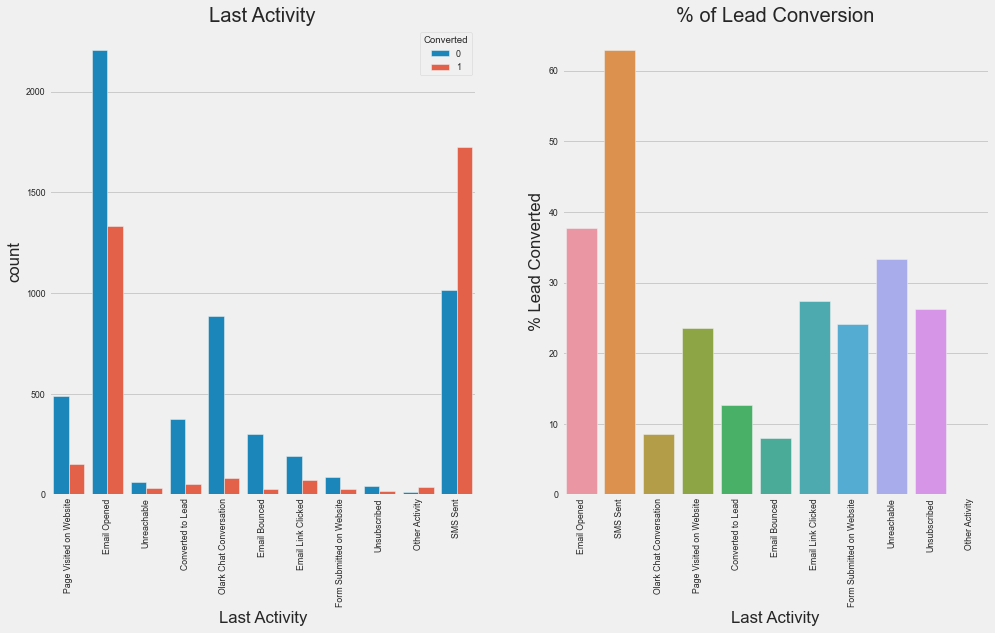

In [61]:
univariate_categorical("Last Activity")

In [62]:
lead.head(2)

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Recommendation,Free Copy
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed,No,No,No,No,No,No,No
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,Others,Unemployed,No,No,No,No,No,No,No


,Specialization,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,Others,3380,969,2411,28.67
1,Finance Management,976,436,540,44.67
2,Human Resource Management,848,388,460,45.75
3,Marketing Management,838,408,430,48.69
4,Operations Management,503,238,265,47.32
5,Business Administration,403,179,224,44.42
6,IT Projects Management,366,140,226,38.25
7,Supply Chain Management,349,151,198,43.27
8,"Banking, Investment And Insurance",338,167,171,49.41
9,Media and Advertising,203,85,118,41.87


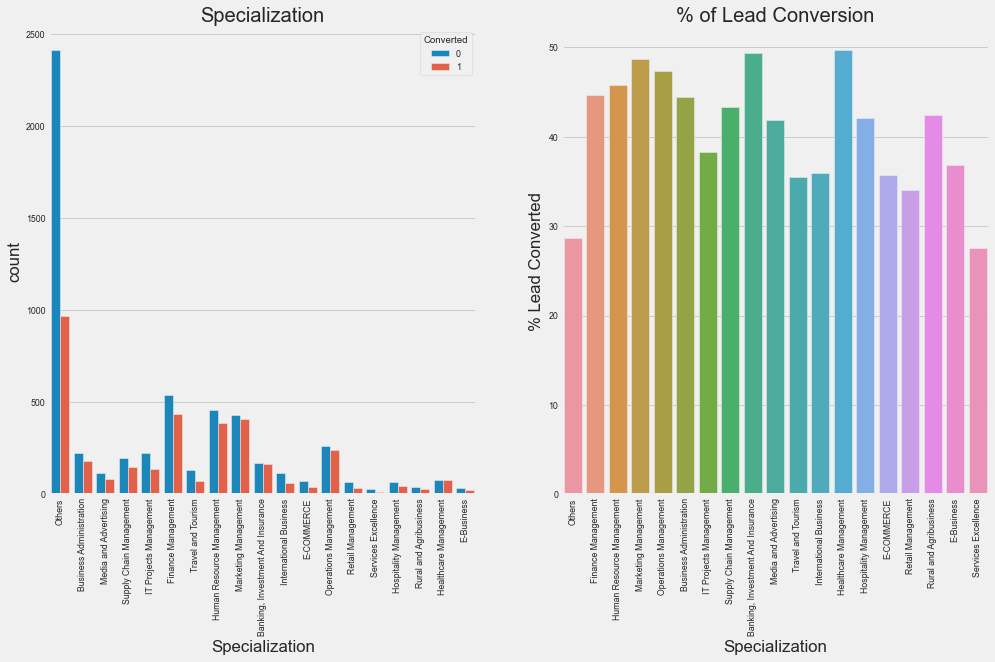

In [63]:
univariate_categorical("Specialization")

,Occupation,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,Unemployed,5600,2441,3159.0,43.59
1,Unknown,2690,370,2320.0,13.75
2,Working Professional,706,647,59.0,91.64
3,Student,210,78,132.0,37.14
4,Other,16,10,6.0,62.50
5,Housewife,10,10,0.0,100.00
6,Businessman,8,5,3.0,62.50


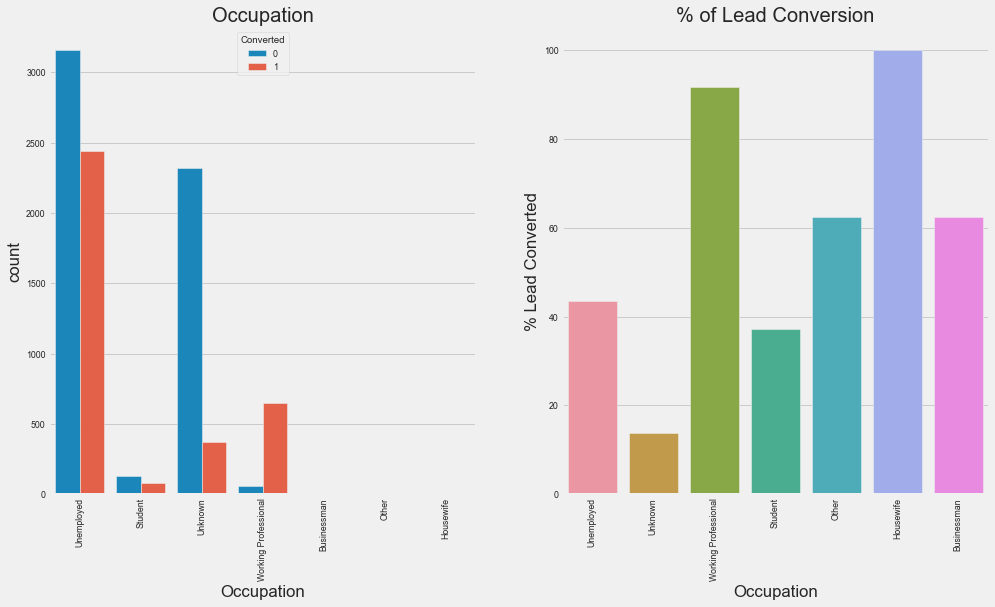

In [64]:
univariate_categorical("Occupation")

Insight:

Though Housewives are less in numbers, they have 100% conversion rate

Working professionals, Businessmen and Other category have high conversion rate

Though Unemployed people have been contacted in the highest number, the conversion rate is low (~40%)

,Search,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,No,9226,3556,5670,38.54
1,Yes,14,5,9,35.71


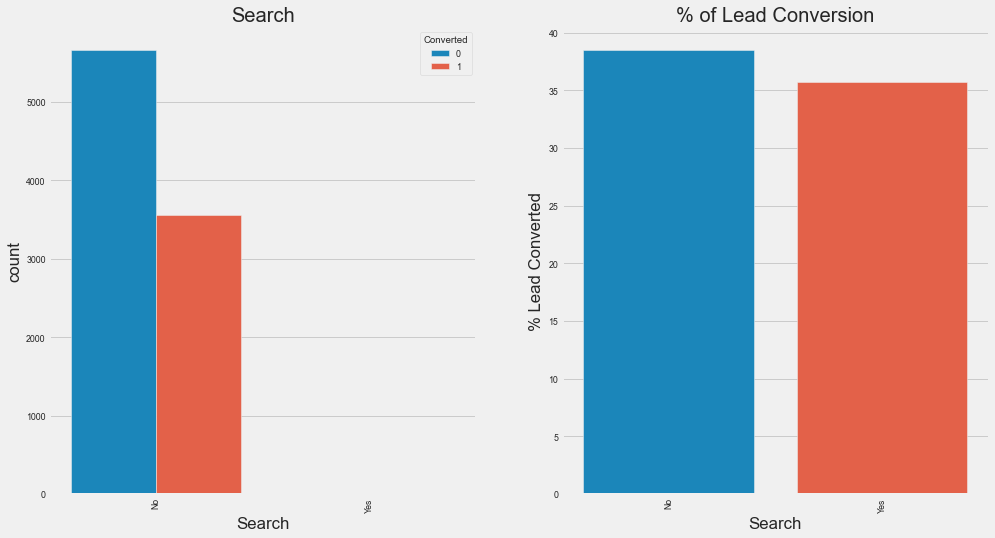

In [65]:
univariate_categorical("Search")

https://www.kaggle.com/amritachatterjee09/lead-scoring-a-logistic-regression-study/notebook

,Newspaper,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,No,9239,3561.0,5678,38.54
1,Yes,1,0.0,1,0.00


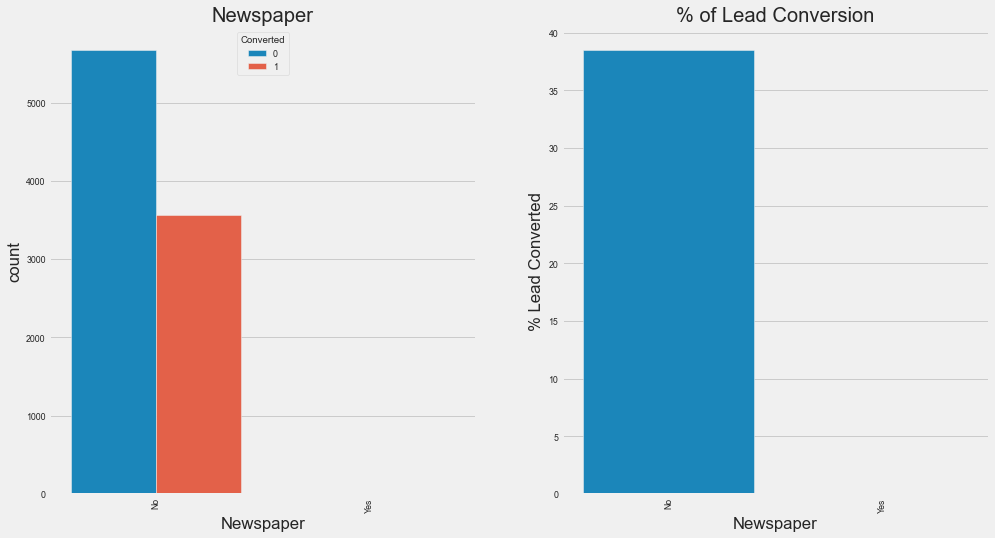

In [66]:
univariate_categorical("Newspaper")

,Digital Advertisement,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,No,9236,3560,5676,38.54
1,Yes,4,1,3,25.00


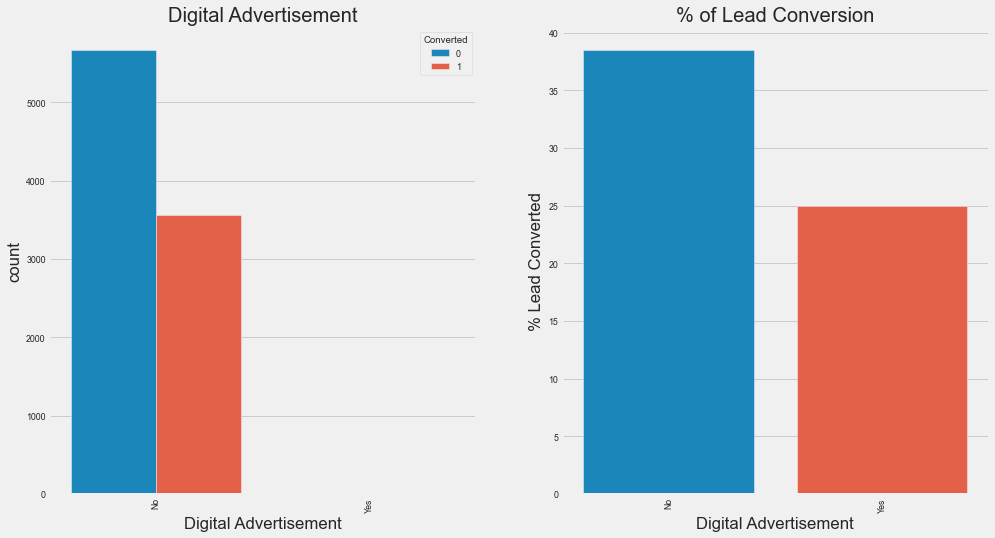

In [67]:
univariate_categorical("Digital Advertisement")

,Recommendation,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,No,9233,3556,5677,38.51
1,Yes,7,5,2,71.43


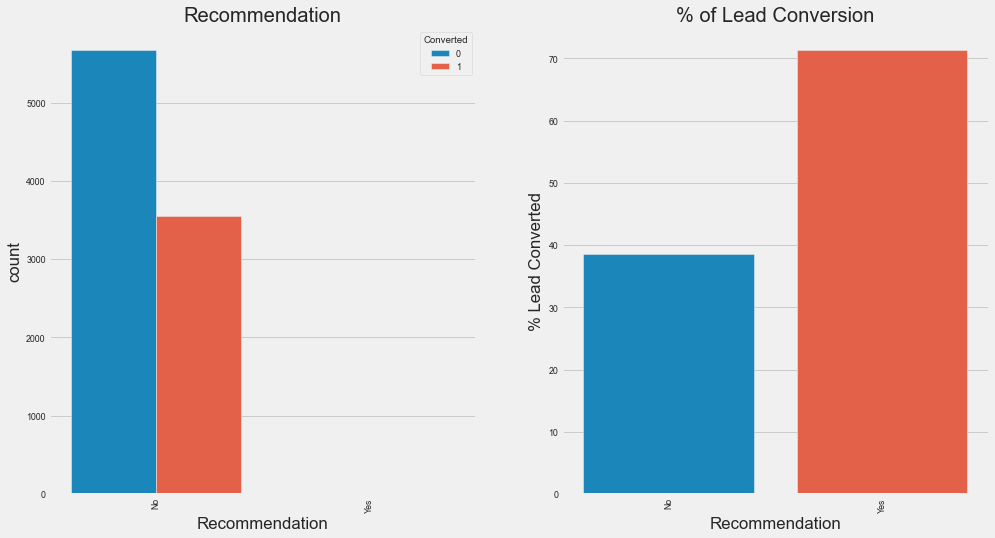

In [68]:
univariate_categorical("Recommendation")

,X Education Forums,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,No,9239,3561.0,5678,38.54
1,Yes,1,0.0,1,0.00


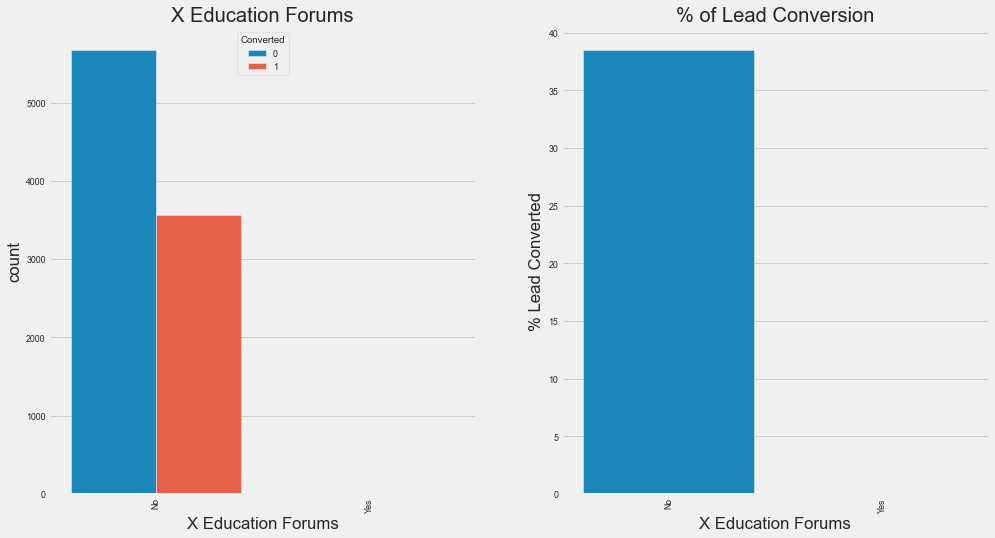

In [69]:
univariate_categorical("X Education Forums")

Strategy:
    
Search, Newspaper, Newspaper Article, Digital Advertisement, ,X Education Forums, Recommendation data are very skewed and can be deleted as they will not add any value to the model.

,Free Copy,Total Leads,Qualified Lead,Non Qualified Lead,% Lead Converted
0,No,6352,2531,3821,39.85
1,Yes,2888,1030,1858,35.66


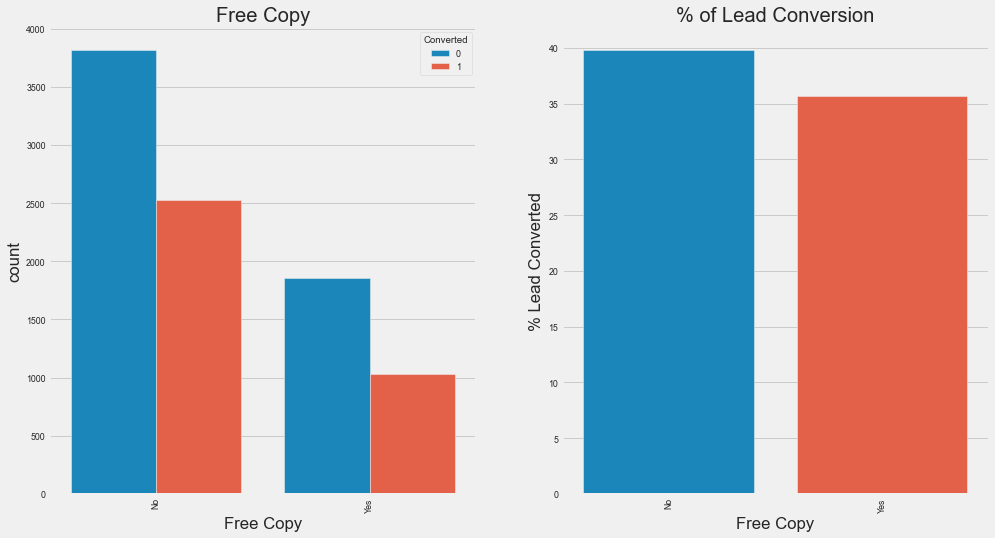

In [70]:
univariate_categorical("Free Copy")

Distributing Free-Copy of Mastering Interview doesn't seem to add much value as the coenversion rate is almost same. We will drop all these column.

In [71]:
col=['Do Not Call','Search', 'Newspaper', 'Newspaper Article', 'Digital Advertisement', 'X Education Forums', 'Free Copy','Recommendation']



lead.drop(col,axis=1,inplace=True)
lead.head(4)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed


# Univariate Analysis- Numercial

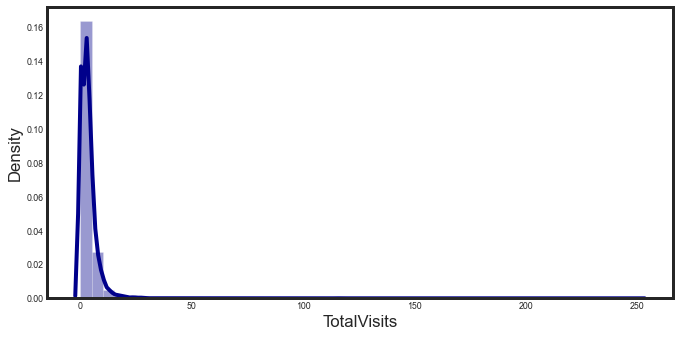

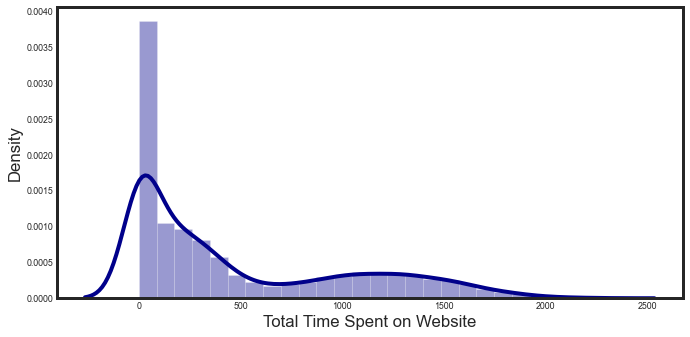

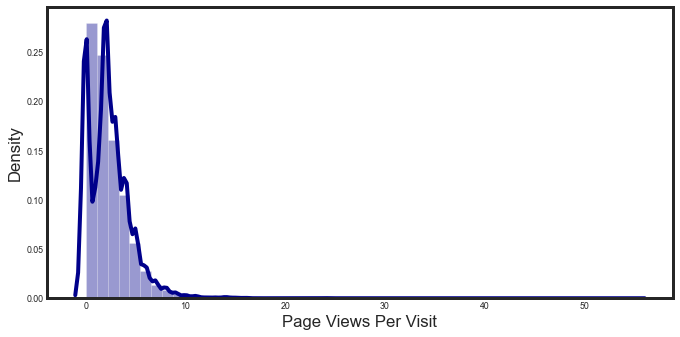

In [72]:
sns.set_style('white')
for feature in numerical_col:
    if feature!= 'Converted':
        plt.figure(figsize=(10,5))
        x = sns.distplot(lead[feature], color = 'darkblue')
        plt.show()

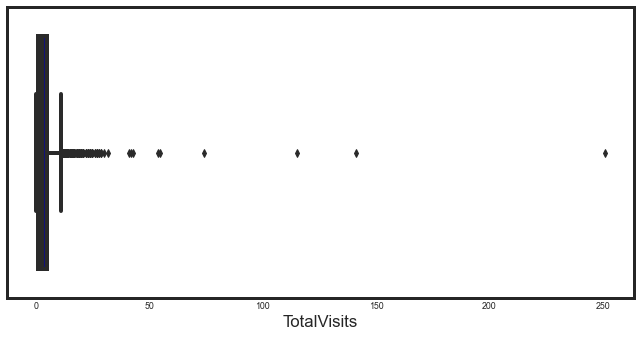

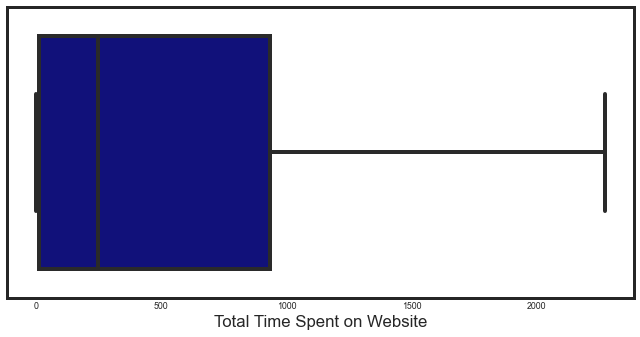

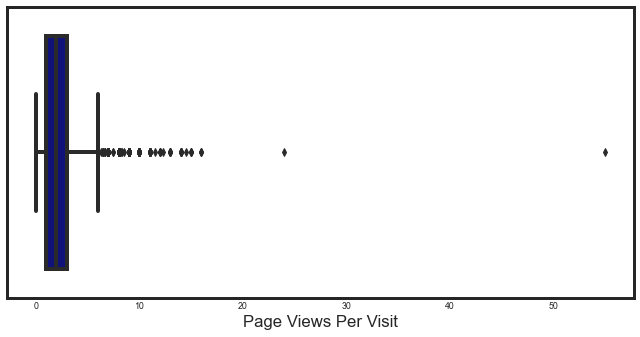

In [73]:
sns.set_style('white')
for feature in numerical_col:
    if feature!= 'Converted':
        plt.figure(figsize=(10,5))
        x = sns.boxplot(lead[feature], color = 'darkblue')
        plt.show()

Insight:
TotalVisits and Page Views per Visit has some outliers which needs to be treated

# Data Preparation

In [74]:
def replace_outlier(df,col):
    IQR=df[col].quantile(.75)-df[col].quantile(.25)
    lower_limit=df[col].quantile(.25)-(1.5*IQR)
    upper_limit=df[col].quantile(.75)+(1.5*IQR)
    non_outlier=np.where((df[col]<lower_limit )|(df[col]>upper_limit),df[col].median(),df[col])
    df[col]=non_outlier

In [75]:
replace_outlier(lead,'Page Views Per Visit')
replace_outlier(lead,'TotalVisits')

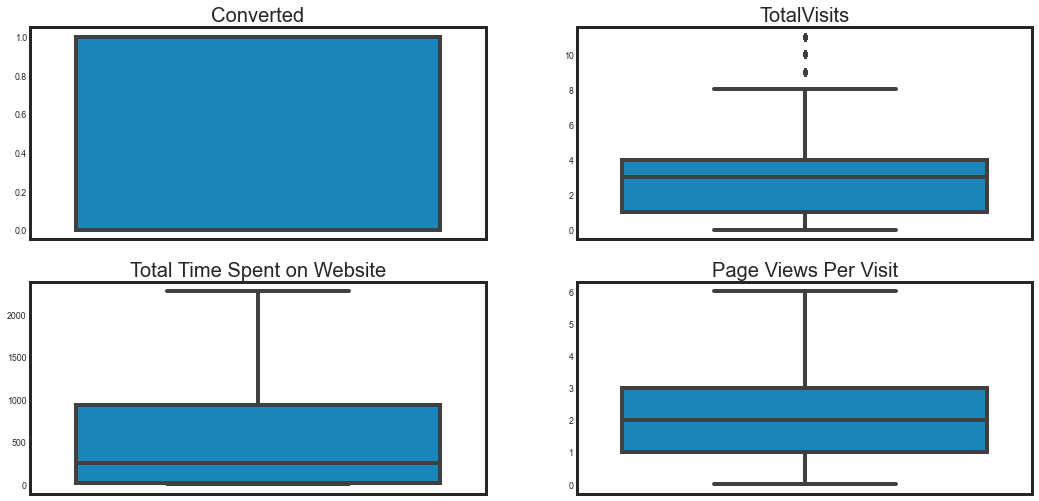

In [76]:
#replotting the graphs to check for outlier treatment
i=1
plt.figure(figsize=[16,8])
for col in numerical_col:
    plt.subplot(2,2,i)
    sns.boxplot(y=lead[col])
    plt.title(col)
    plt.ylabel('')
    i+=1

Insight:
    
1- We have sucessfully replace our outliers with median values.

# Convert Binary Categories

In [77]:
lead.nunique().sort_values()

Do Not Email                      2
Converted                         2
Lead Origin                       5
Occupation                        7
Lead Source                       9
Last Activity                    11
TotalVisits                      12
Specialization                   19
Page Views Per Visit             91
Total Time Spent on Website    1731
dtype: int64

In [78]:
lead=lead.replace({"Yes": 1, "No":0})

In [79]:
lead.head(9)

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,Occupation
0,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Others,Unemployed
1,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Others,Unemployed
2,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student
3,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed
4,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Others,Unemployed
5,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,Others,Unknown
6,Landing Page Submission,Google,0,1,2.0,1640,2.0,Email Opened,Supply Chain Management,Unemployed
7,API,Olark Chat,0,0,0.0,0,0.0,Olark Chat Conversation,Others,Unknown
8,Landing Page Submission,Direct Traffic,0,0,2.0,71,2.0,Email Opened,IT Projects Management,Unknown


# Dummy Variables

In [80]:
lead=pd.get_dummies(lead,columns=['Lead Origin','Lead Source','Last Activity','Specialization','Occupation'],drop_first=True)

# Label Encoder

In [81]:
# from sklearn.preprocessing import LabelEncoder
# le=LabelEncoder()
# for col in lead.columns:
#     if lead[col].dtype=='object':
#         lead[col]=le.fit_transform(lead[col])

In [82]:
# lead.columns

In [83]:
# import category_encoders as ce
# encoder=ce.TargetEncoder()
# for col in lead.columns:
#     if lead[col].dtype=='object':
#         lead[col]=encoder.fit_transform(lead[col],lead['Converted'])

In [84]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 51 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Do Not Email                              9240 non-null   int64  
 1   Converted                                 9240 non-null   int64  
 2   TotalVisits                               9240 non-null   float64
 3   Total Time Spent on Website               9240 non-null   int64  
 4   Page Views Per Visit                      9240 non-null   float64
 5   Lead Origin_Landing Page Submission       9240 non-null   uint8  
 6   Lead Origin_Lead Add Form                 9240 non-null   uint8  
 7   Lead Origin_Lead Import                   9240 non-null   uint8  
 8   Lead Origin_Quick Add Form                9240 non-null   uint8  
 9   Lead Source_Facebook                      9240 non-null   uint8  
 10  Lead Source_Google                  

# HeatMap

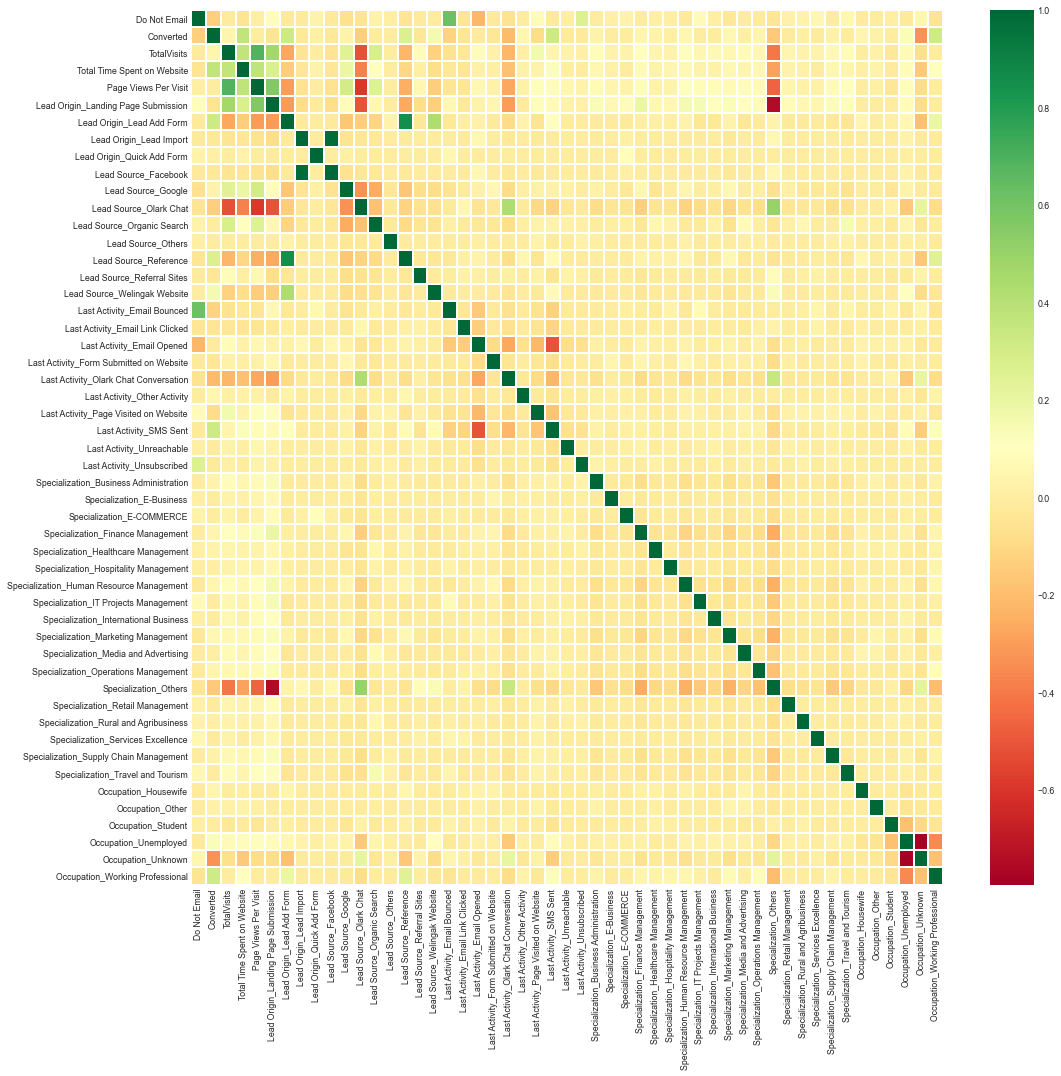

In [85]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(lead.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

<AxesSubplot:title={'center':'Correlation With target'}>

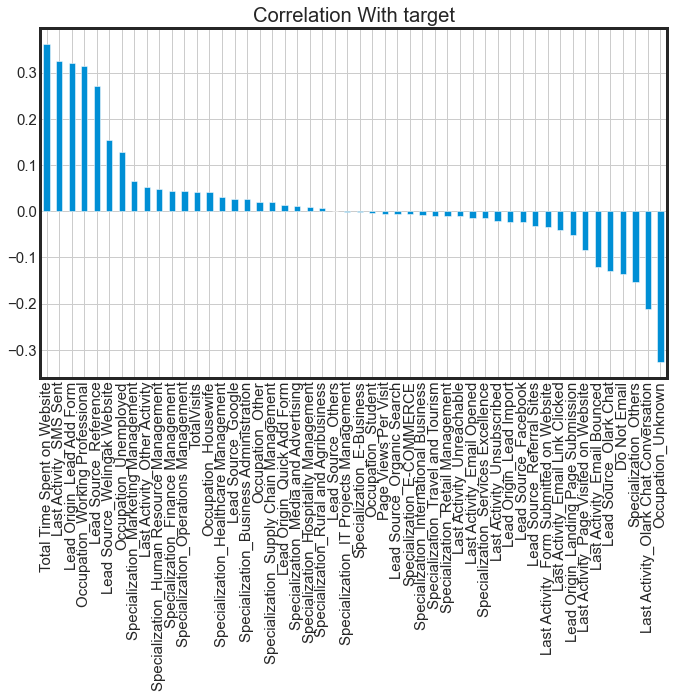

In [86]:
lead.corr()['Converted'].sort_values(ascending=False).drop(['Converted']).plot.bar(figsize=(10,6),grid=True,title='Correlation With target',fontsize=15)

# Top 5 positive Correlated

In [87]:
corr_lead = lead.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
466,Lead Source_Facebook,Lead Origin_Lead Import,0.981709
720,Lead Source_Reference,Lead Origin_Lead Add Form,0.853237
206,Page Views Per Visit,TotalVisits,0.686084
867,Last Activity_Email Bounced,Do Not Email,0.618470
259,Lead Origin_Landing Page Submission,Page Views Per Visit,0.560028


# Top 5 Negative Correlated

In [88]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
2547,Occupation_Unknown,Occupation_Unemployed,-0.794875
1994,Specialization_Others,Lead Origin_Landing Page Submission,-0.748263
565,Lead Source_Olark Chat,Page Views Per Visit,-0.586109
563,Lead Source_Olark Chat,TotalVisits,-0.514620
566,Lead Source_Olark Chat,Lead Origin_Landing Page Submission,-0.512950


# Train - Test Split

In [89]:
# target variable
Y = lead['Converted']
X = lead.drop(['Converted'], axis=1)


# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=100)

In [90]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (6468, 50)
 Shape of y_train is :  (6468,)
 Shape of X_test is  :  (2772, 50)
 Shape of y_test is  :  (2772,)


# Feature Scaling

Feature Scaling: We standardized the numeric attributes so they have a common mean of zero, if they were measured on different scales.

Insight:

Now that we have our Train and Test data bases ready and Train database standardized, let's try building some model using Logistic Regression.

In [91]:
# data normalization with sklearn
from sklearn.preprocessing import StandardScaler

# fit scaler on training data
ss = StandardScaler().fit(X_train)

# transform training data
X_train_norm = ss.transform(X_train)

# transform testing dataabs
X_test_norm = ss.transform(X_test)

# Model Building

In [92]:
model=[LogisticRegression(),DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),GaussianNB(),RandomForestClassifier()]

In [93]:
score=[]
f_1=[]
CV_score=[]
model_name=[]
SD=[]
def best_model(clf):
    clf.fit(X_train_norm,y_train)
    print(clf)
    print('Trainng Score:',clf.score(X_train_norm,y_train))
    print('Testing score:',clf.score(X_test_norm,y_test))
    pred=clf.predict(X_test_norm)
    print('Accuracy_score',accuracy_score(y_test,pred))
    print('F1 score',f1_score(y_test,pred))
    print('cross validation score',cross_val_score(clf,X,Y,scoring='accuracy').mean())
    print('Standard Deviation',cross_val_score(clf,X,Y,scoring='accuracy').std())
    print('confusion matrix',confusion_matrix(y_test,pred))
    print('\n')
    print('Classification Report',classification_report(y_test,pred))
    print('---'*20)
    print('Roc_auc Score',roc_auc_score(y_test,pred))
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,pred)
    roc_auc = auc( false_positive_rate, true_positive_rate)
    plt.plot(false_positive_rate, true_positive_rate,label = "AUC = %0.2f"% roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc = 'lower right')
    plt.ylabel("True positive rate")
    plt.xlabel("False positive rate")
    print("\n\n")
    score.append(accuracy_score(y_test,pred))
    CV_score.append(cross_val_score(clf,X,Y,scoring='accuracy').mean())
    f_1.append(f1_score(y_test,pred))
    SD.append(cross_val_score(clf,X,Y,scoring='accuracy').std())

LogisticRegression()
Trainng Score: 0.8229746444032159
Testing score: 0.8145743145743146
Accuracy_score 0.8145743145743146
F1 score 0.7480392156862745
cross validation score 0.8053030303030303
Standard Deviation 0.02188289208203414
confusion matrix [[1495  182]
 [ 332  763]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.89      0.85      1677
           1       0.81      0.70      0.75      1095

    accuracy                           0.81      2772
   macro avg       0.81      0.79      0.80      2772
weighted avg       0.81      0.81      0.81      2772

------------------------------------------------------------
Roc_auc Score 0.7941382605925454





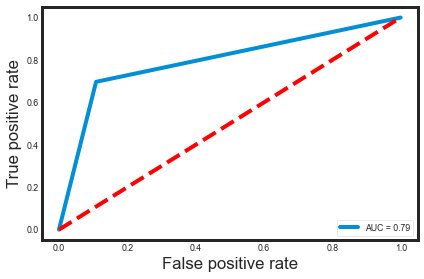

In [94]:
lr=LogisticRegression()
best_model(lr)

RandomForestClassifier()
Trainng Score: 0.9732529375386518
Testing score: 0.8073593073593074
Accuracy_score 0.8073593073593074
F1 score 0.7464387464387465
cross validation score 0.8096320346320345
Standard Deviation 0.017132414065199025
confusion matrix [[1452  225]
 [ 309  786]]


Classification Report               precision    recall  f1-score   support

           0       0.82      0.87      0.84      1677
           1       0.78      0.72      0.75      1095

    accuracy                           0.81      2772
   macro avg       0.80      0.79      0.80      2772
weighted avg       0.81      0.81      0.81      2772

------------------------------------------------------------
Roc_auc Score 0.7918200308770554





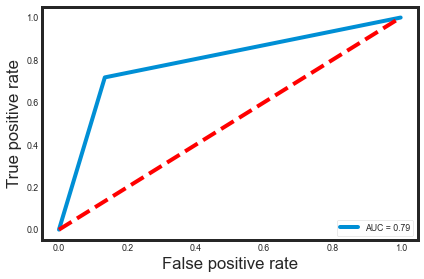

In [95]:
rf=RandomForestClassifier()
best_model(rf)

DecisionTreeClassifier()
Trainng Score: 0.9732529375386518
Testing score: 0.7716450216450217
Accuracy_score 0.7716450216450217
F1 score 0.7084292952556426
cross validation score 0.7711038961038962
Standard Deviation 0.014650817883192217
confusion matrix [[1370  307]
 [ 326  769]]


Classification Report               precision    recall  f1-score   support

           0       0.81      0.82      0.81      1677
           1       0.71      0.70      0.71      1095

    accuracy                           0.77      2772
   macro avg       0.76      0.76      0.76      2772
weighted avg       0.77      0.77      0.77      2772

------------------------------------------------------------
Roc_auc Score 0.7596090540021728





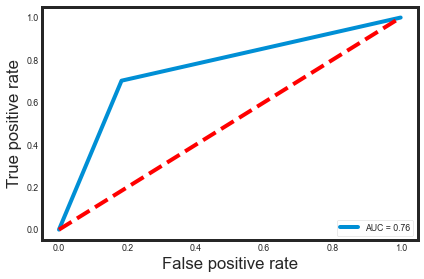

In [96]:
dt=DecisionTreeClassifier()
best_model(dt)

GaussianNB()
Trainng Score: 0.7333024118738405
Testing score: 0.70995670995671
Accuracy_score 0.70995670995671
F1 score 0.453804347826087
cross validation score 0.7403679653679653
Standard Deviation 0.014460915686591415
confusion matrix [[1634   43]
 [ 761  334]]


Classification Report               precision    recall  f1-score   support

           0       0.68      0.97      0.80      1677
           1       0.89      0.31      0.45      1095

    accuracy                           0.71      2772
   macro avg       0.78      0.64      0.63      2772
weighted avg       0.76      0.71      0.66      2772

------------------------------------------------------------
Roc_auc Score 0.6396909027046014





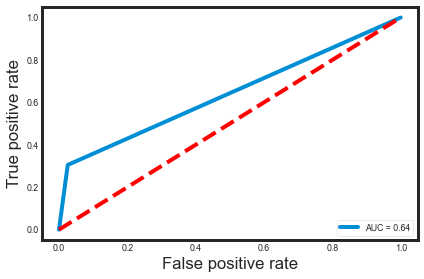

In [97]:
nb=GaussianNB()
best_model(nb)

KNeighborsClassifier()
Trainng Score: 0.8466295609152752
Testing score: 0.7857142857142857
Accuracy_score 0.7857142857142857
F1 score 0.6993927125506073
cross validation score 0.7675324675324675
Standard Deviation 0.008702537009945744
confusion matrix [[1487  190]
 [ 404  691]]


Classification Report               precision    recall  f1-score   support

           0       0.79      0.89      0.83      1677
           1       0.78      0.63      0.70      1095

    accuracy                           0.79      2772
   macro avg       0.79      0.76      0.77      2772
weighted avg       0.79      0.79      0.78      2772

------------------------------------------------------------
Roc_auc Score 0.7588763365762409





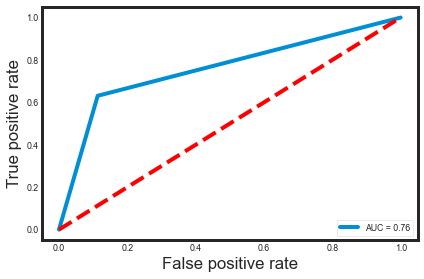

In [98]:
knn=KNeighborsClassifier()
best_model(knn)

SVC()
Trainng Score: 0.8388991960420532
Testing score: 0.8055555555555556
Accuracy_score 0.8055555555555556
F1 score 0.7346134908911867
cross validation score 0.7311688311688311
Standard Deviation 0.01301584102023627
confusion matrix [[1487  190]
 [ 349  746]]


Classification Report               precision    recall  f1-score   support

           0       0.81      0.89      0.85      1677
           1       0.80      0.68      0.73      1095

    accuracy                           0.81      2772
   macro avg       0.80      0.78      0.79      2772
weighted avg       0.80      0.81      0.80      2772

------------------------------------------------------------
Roc_auc Score 0.7839904918273825





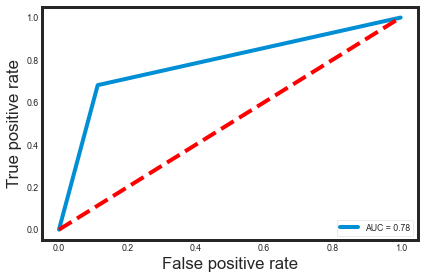

In [99]:
svc=SVC()
best_model(svc)

In [100]:
Final=pd.DataFrame()
Final['Model']=['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','GaussianNB','RandomForestClassifier']

Final["Accuracy Score"]=score
Final['Cross Val']=CV_score
Final['Standard Deviation']=SD
Final['Diff']=Final["Accuracy Score"]-Final['Cross Val']
Final['F_1 Score']=f_1
Final

,Model,Accuracy Score,Cross Val,Standard Deviation,Diff,F_1 Score
0,LogisticRegression,0.814574,0.805303,0.021883,0.009271,0.748039
1,DecisionTreeClassifier,0.807359,0.809524,0.017831,-0.002165,0.746439
2,SVC,0.771645,0.772727,0.014360,-0.001082,0.708429
3,KNeighborsClassifier,0.709957,0.740368,0.014461,-0.030411,0.453804
4,GaussianNB,0.785714,0.767532,0.008703,0.018182,0.699393
5,RandomForestClassifier,0.805556,0.731169,0.013016,0.074387,0.734613


In [101]:
# Final=pd.DataFrame()
# Final['Model']=['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','GaussianNB','RandomForestClassifier']

# Final["Accuracy Score"]=score
# Final['Cross Val']=CV_score
# Final['Standard Deviation']=SD
# Final['Diff']=Final["Accuracy Score"]-Final['Cross Val']
# Final['F_1 Score']=f_1
# Final

In [102]:
# Final=pd.DataFrame()
# Final['Model']=['LogisticRegression','DecisionTreeClassifier','SVC','KNeighborsClassifier','GaussianNB','RandomForestClassifier']

# Final["Accuracy Score"]=score
# Final['Cross Val']=CV_score
# Final['Standard Deviation']=SD
# Final['Diff']=Final["Accuracy Score"]-Final['Cross Val']
# Final['F_1 Score']=f_1
# Final

We could see that Logistic Regression is our best model among all because it givers us a very good accuracy & f 1 score with least difference with cross validation score so we will Logistic regression as our best model

# Hyperparameter Tuning

In [103]:
lg_1=LogisticRegression()
param={'penalty':['l2','l1','elasticnet'],'C':[.001,.01,.1,1,10],'solver':['newton-cg','lbfgs','liblinear','sag','saga'],'max_iter':[50,100,200]}

grid=GridSearchCV(estimator=lg_1,param_grid=param,scoring='accuracy',n_jobs=-1)

grid.fit(X_train_norm,y_train)

grid.best_params_

{'C': 1, 'max_iter': 200, 'penalty': 'l1', 'solver': 'saga'}

In [104]:
lgm=LogisticRegression(C=10,max_iter=200,penalty='l1',solver='saga')
lgm.fit(X_train_norm,y_train)
pred=lgm.predict(X_test_norm)
print('Final Accuracy_score :',accuracy_score(pred,y_test))
print('\n')
print('Final f_1 score :',f1_score(pred,y_test))
print('\n')
print('Final roc_auc score :',roc_auc_score(pred,y_test))
print('\n')
print('Final classification Report :',classification_report(pred,y_test))
print('\n')
print('Final confusion Matrix :',confusion_matrix(pred,y_test))

Final Accuracy_score : 0.8156565656565656


Final f_1 score : 0.7493869543894065


Final roc_auc score : 0.8141249119163297


Final classification Report :               precision    recall  f1-score   support

           0       0.89      0.82      0.85      1828
           1       0.70      0.81      0.75       944

    accuracy                           0.82      2772
   macro avg       0.80      0.81      0.80      2772
weighted avg       0.83      0.82      0.82      2772



Final confusion Matrix : [[1497  331]
 [ 180  764]]


We could see with hyperparameter tuning we couldn't see any better result. So we will save our previous default model.

# Saving Model

In [105]:
import pickle
filename='LeadScoring'
pickle.dump(lgm,open(filename,'wb'))

In [106]:
loaded_model=pickle.load(open(filename,'rb'))

# Loading our model

In [107]:
loaded_model.score(X_test_norm,y_test)

0.8156565656565656

In [108]:
loaded_model.predict_proba([[0,2,1532,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0]])

array([[0., 1.]])

In [109]:
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other Activity,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Others,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,Occupation_Housewife,Occupation_Other,Occupation_Student,Occupation_Unemployed,Occupation_Unknown,Occupation_Working Professional
0,0,0.0,0,0.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
2,0,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,2.0,1428,1.0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [110]:
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64